In [2]:
import pandas as pd
import numpy as np
import re, os

#Creating two arrays, one of both login/logout times, converted to the minute of the day
df = pd.read_csv('../exercises/hs_in_out2.csv')
df = df[["Login Time", "Logout Time"]]
df = df.dropna()
login_times = pd.DatetimeIndex(df['Login Time'])
login_times = login_times.hour * 60 + login_times.minute
logout_times = pd.DatetimeIndex(df['Logout Time'])
logout_times = logout_times.hour * 60 + logout_times.minute
print(login_times)
print(logout_times)
# for i in range(len(login_times)):
#     if (np.isnan(login_times[i]) == True) or (np.isnan(logout_times[i]) == True):
#         login_times.delete(i)
#         logout_times.delete(i)
# for j in range(len(login_times)):
#     print(np.isnan(login_times[j]))
#     print(np.isnan(logout_times[j]))

Int64Index([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            ...
            1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439, 1439],
           dtype='int64', name='Login Time', length=64464)
Int64Index([ 22, 107,  85, 199,  25,  25, 266, 128,  66,  52,
            ...
             29,  53,   3,   6,  24,  34,  58,  33,  46,  24],
           dtype='int64', name='Logout Time', length=64464)


In [3]:
#Initializing array full of zeros, of length 1440 (minutes in a day) to represent number of students logged in at any given minute
minutes = []
minutes_x = []
for i in range(1440):
    minutes.append(0)
    minutes_x.append(i)

for i in range(len(login_times)):
    if login_times[i] < logout_times[i]:
        for j in range(int(login_times[i]),int(logout_times[i])):
            minutes[j] = minutes[j] + 1
    else:
        for j in range(int(login_times[i]),1440):
            minutes[j] = minutes[j] + 1
        for j in range(0,int(logout_times[i])):
            minutes[j] = minutes[j] + 1
            

print(minutes)

#print(minutes_x)
            


[4463, 4454, 4452, 4448, 4438, 4425, 4427, 4415, 4407, 4410, 4402, 4396, 4382, 4369, 4365, 4349, 4348, 4348, 4346, 4330, 4319, 4303, 4292, 4284, 4283, 4286, 4275, 4264, 4265, 4262, 4257, 4246, 4238, 4221, 4210, 4191, 4183, 4173, 4158, 4154, 4142, 4131, 4111, 4102, 4091, 4085, 4068, 4063, 4050, 4042, 4022, 4021, 4009, 4000, 3990, 3965, 3954, 3947, 3945, 3935, 3918, 3899, 3898, 3892, 3880, 3872, 3853, 3841, 3836, 3829, 3813, 3799, 3788, 3777, 3769, 3758, 3747, 3734, 3720, 3709, 3699, 3690, 3681, 3668, 3667, 3665, 3657, 3650, 3640, 3632, 3618, 3606, 3593, 3583, 3573, 3565, 3553, 3547, 3538, 3528, 3527, 3516, 3507, 3503, 3494, 3485, 3479, 3473, 3465, 3452, 3453, 3447, 3443, 3437, 3430, 3426, 3412, 3404, 3398, 3393, 3387, 3389, 3387, 3382, 3377, 3371, 3371, 3371, 3362, 3360, 3359, 3352, 3350, 3344, 3335, 3331, 3330, 3325, 3323, 3317, 3313, 3305, 3298, 3292, 3290, 3287, 3282, 3280, 3275, 3272, 3268, 3262, 3255, 3246, 3239, 3236, 3228, 3228, 3220, 3216, 3205, 3197, 3194, 3191, 3186, 3186, 317

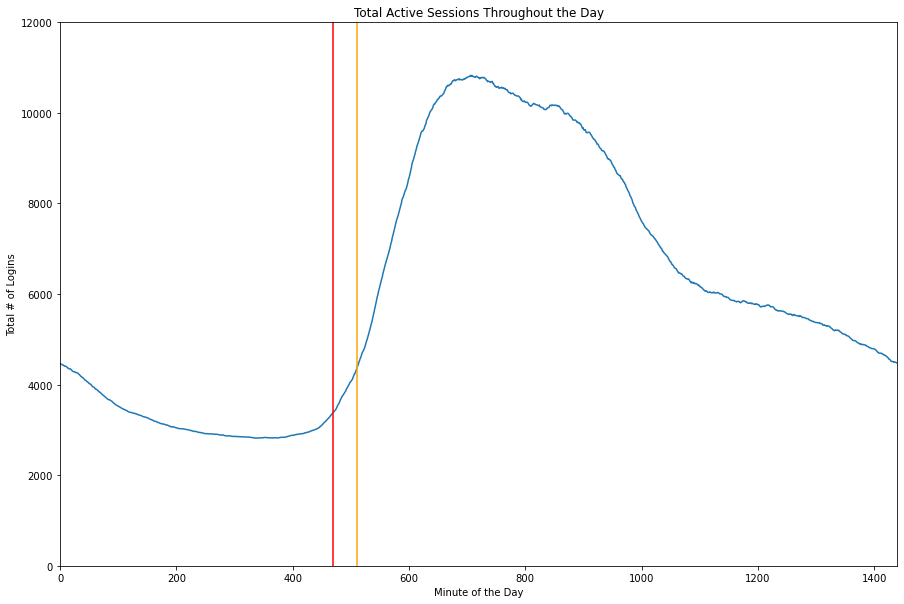

In [9]:
import matplotlib.pyplot as plt

#Making bar chart with X as every minute of the day, Y as total number of login sessions that have occurred during the minute
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(minutes_x,minutes)
#ax.set_xlabel("Minute of the Day")
#ax.set_ylabel("Total # of Logins")
plt. rcParams["figure.figsize"] = (15, 10)
plt.plot(minutes_x,minutes)
plt.ylabel("Total # of Logins")
plt.xlabel("Minute of the Day")
plt.xlim(0,1439)
plt.ylim(0,12000)
#plt.axvline(x=135,color="red")
plt.axvline(x=470,color="red")
plt.axvline(x=510,color="orange")
plt.title("Total Active Sessions Throughout the Day")
plt.savefig('chrono-heatmap.png', transparent = False)
plt.show()

In [7]:
print(minutes[470])
print(minutes[500])


3388
4070
